## SHRUTI BIBRA 
## Gripjuly'21
## Prediction using supervised ml 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Text(0.5, 1.0, 'marks vs hours')

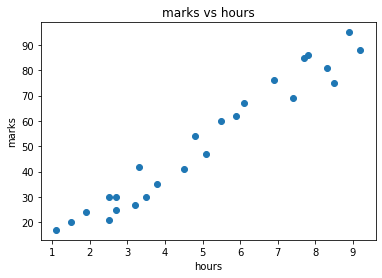

In [6]:
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel("hours")
plt.ylabel("marks")
plt.title("marks vs hours")

## Data Cleaning

In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Splitting

In [10]:
X = df.drop("Scores",axis ="columns")
Y = df.drop("Hours" , axis ="columns")

In [11]:
print(X.shape)
print(Y.shape)

(25, 1)
(25, 1)


## Training Data , Linear regression

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=51)

In [14]:
X_train.shape

(20, 1)

In [15]:
X_test.shape

(5, 1)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
lr.coef_

array([[9.56433743]])

In [19]:
lr.intercept_

array([2.70197068])

In [20]:
lr.predict([[9.25]])[0][0].round(2) #answer

91.17

In [21]:
Y_pred = lr.predict(X_test)
Y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [22]:
pd.DataFrame(np.c_[X_test,Y_test,Y_pred], columns = ["Studyhours","Studentmarks_original","Studentmarks_predicted"])

,Studyhours,Studentmarks_original,Studentmarks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


## Accuracy

In [23]:
lr.score(X_test,Y_test)

0.9238518102278781

In [24]:
import joblib

In [25]:
model = joblib.dump(lr,"studentmarks_predictor.pkl")